In [1]:
library(tidyverse)
library(dplyr)
library(readxl)
library(ggpubr)
library(lme4)
library(ggplot2)
library(broom)
library(purrr)
library(cowplot)
library(grid)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::recode() masks car::recode()
x purrr::some()   masks car::some()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack



Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend


The following object is masked from 'package:lubridate':

    stamp




# COVID-19 Study Analysis
```{figure} _images/vaccine.jpg
name: vaccine
---
MGH Analysis Report Cover
```

```{admonition} Notes
The dataset analyzed in this study was obtained from Olink’s MGH COVID-19 study site [^ref1]. The primary objective was to create informative visualizations that effectively highlight the dataset’s key characteristics.

To enhance clarity and readability, most code cells have been collapsed. Simply expand the drop-down sections to view the underlying code.
```

## 1. Exploratory Data Analysis

This section of the report provides an overview of the preliminary data analysis procedures. The steps involved include loading the dataset, followed by a thorough inspection of its structure to assess key characteristics such as data types, missing values, and overall organization.

In [49]:
patient_df <- read.delim("/Users/jennylee/Downloads/MGH_Olink_COVID_Apr_27_2021/MGH_COVID_Clinical_Info.txt", header=TRUE, sep=";")
head(patient_df)
print(paste0("This dataframe has ", nrow(patient_df), " rows in total."))
glimpse(patient_df)

,subject_id,COVID,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,crp_3_cat,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,4,0,0,0,0,0,0,...,1,1,1,NA,NA,NA,NA,NA,NA,NA
2,2,1,2,2,0,0,0,0,0,0,...,2,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,1,3,4,0,1,0,0,0,0,...,3,2,3,NA,NA,NA,NA,NA,NA,NA
4,4,1,1,2,0,0,0,0,0,0,...,2,2,3,NA,NA,NA,NA,NA,NA,NA
5,5,1,3,3,0,0,0,1,1,0,...,5,3,NA,3,5,3,1,4,4,3
6,6,1,1,1,1,0,0,0,0,0,...,4,3,5,3,3,2,1,4,5,5


[1] "This dataframe has 384 rows in total."
Rows: 384
Columns: 44
$ subject_id      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,~
$ COVID           <int> 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, ~
$ Age_cat         <int> 1, 2, 3, 1, 3, 1, 2, 4, 5, 2, 3, 2, 4, 4, 4, 3, 3, 2, ~
$ BMI_cat         <int> 4, 2, 4, 2, 3, 1, 2, 3, 2, 2, 2, 4, 4, 3, 2, 3, 1, 2, ~
$ HEART           <int> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ~
$ LUNG            <int> 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, ~
$ KIDNEY          <int> 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ~
$ DIABETES        <int> 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ~
$ HTN             <int> 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, ~
$ IMMUNO          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, ~
$ Resp_Symp       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ~
$ Fever_Sympt     <int> 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 

In [56]:
protein_df <- read.delim("/Users/jennylee/Downloads/MGH_Olink_COVID_Apr_27_2021/MGH_COVID_OLINK_NPX.txt", header=TRUE, sep=";")
head(protein_df)
print(paste0("This dataframe has ", nrow(protein_df), " rows in total."))
glimpse(protein_df)

,SampleID,subject_id,Timepoint,Index,OlinkID,UniProt,Assay,MissingFreq,Panel,Panel_Lot_Nr,PlateID,QC_Warning,Assay_Warning,Normalization,LOD,NPX
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1_D0,1,D0,56,OID21311,Q9BTE6,AARSD1,0.0000,Oncology,B04404,20200772_Plate5,PASS,PASS,Intensity,-1.0810,1.9024
2,1_D0,1,D0,56,OID20921,Q96IU4,ABHD14B,0.0000,Neurology,B04406,20200772_Plate5,PASS,PASS,Intensity,-1.4574,-0.2625
3,1_D0,1,D0,56,OID21280,P00519,ABL1,0.0013,Oncology,B04404,20200772_Plate5,PASS,PASS,Intensity,-2.4697,0.2659
4,1_D0,1,D0,56,OID21269,P09110,ACAA1,0.1248,Oncology,B04404,20200772_Plate5,PASS,PASS,Intensity,-0.2027,0.5311
5,1_D0,1,D0,56,OID20159,P16112,ACAN,0.0000,Cardiometabolic,B04405,20200772_Plate5,PASS,PASS,Intensity,-3.3481,-2.0366
6,1_D0,1,D0,56,OID20105,Q9BYF1,ACE2,0.0561,Cardiometabolic,B04405,20200772_Plate5,PASS,PASS,Intensity,-1.9055,-1.4261


[1] "This dataframe has 1271808 rows in total."
Rows: 1,271,808
Columns: 16
$ SampleID      <chr> "1_D0", "1_D0", "1_D0", "1_D0", "1_D0", "1_D0", "1_D0", ~
$ subject_id    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,~
$ Timepoint     <chr> "D0", "D0", "D0", "D0", "D0", "D0", "D0", "D0", "D0", "D~
$ Index         <int> 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, ~
$ OlinkID       <chr> "OID21311", "OID20921", "OID21280", "OID21269", "OID2015~
$ UniProt       <chr> "Q9BTE6", "Q96IU4", "P00519", "P09110", "P16112", "Q9BYF~
$ Assay         <chr> "AARSD1", "ABHD14B", "ABL1", "ACAA1", "ACAN", "ACE2", "A~
$ MissingFreq   <dbl> 0.0000, 0.0000, 0.0013, 0.1248, 0.0000, 0.0561, 0.8127, ~
$ Panel         <chr> "Oncology", "Neurology", "Oncology", "Oncology", "Cardio~
$ Panel_Lot_Nr  <chr> "B04404", "B04406", "B04404", "B04404", "B04405", "B0440~
$ PlateID       <chr> "20200772_Plate5", "20200772_Plate5", "20200772_Plate5",~
$ QC_Warning    <chr> "PASS", "PASS", "PASS"

### 1.1 Count Missing Values

In [57]:
count_missing_values <- function(df) {
      missing_counts <- colSums(is.na(df))

      missing_counts_df <- data.frame(
            Column = names(missing_counts),
            Missing_Count = as.numeric(missing_counts)
      )
      return(missing_counts_df)
}
count_missing_values(protein_df)
count_missing_values(patient_df)

Column,Missing_Count
<chr>,<dbl>
SampleID,0
subject_id,117760
Timepoint,0
Index,0
OlinkID,0
UniProt,0
Assay,0
MissingFreq,0
Panel,0


Column,Missing_Count
<chr>,<dbl>
subject_id,0
COVID,0
Age_cat,0
BMI_cat,0
HEART,0
LUNG,0
KIDNEY,0
DIABETES,0
HTN,0


In [59]:
rows_before_drop <- nrow(protein_df)
protein_df <- protein_df |>
      filter(!is.na(subject_id))
rows_after_drop <- nrow(protein_df)
remaining_rows = rows_before_drop - rows_after_drop
print(paste0("In total, ", remaining_rows, " rows have been dropped."))
print(paste0(nrow(protein_df), " rows remain."))

[1] "In total, 0 rows have been dropped."
[1] "1154048 rows remain."


### 1.2 Join the Two Data Frames

In [4]:
join_df <- inner_join(patient_df, protein_df, by="subject_id")
nrow(join_df)
head(join_df)

[1] 1154048

,subject_id,COVID,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,Assay,MissingFreq,Panel,Panel_Lot_Nr,PlateID,QC_Warning,Assay_Warning,Normalization,LOD,NPX
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,1,1,4,0,0,0,0,0,0,...,AARSD1,0.0000,Oncology,B04404,20200772_Plate5,PASS,PASS,Intensity,-1.0810,1.9024
2,1,1,1,4,0,0,0,0,0,0,...,ABHD14B,0.0000,Neurology,B04406,20200772_Plate5,PASS,PASS,Intensity,-1.4574,-0.2625
3,1,1,1,4,0,0,0,0,0,0,...,ABL1,0.0013,Oncology,B04404,20200772_Plate5,PASS,PASS,Intensity,-2.4697,0.2659
4,1,1,1,4,0,0,0,0,0,0,...,ACAA1,0.1248,Oncology,B04404,20200772_Plate5,PASS,PASS,Intensity,-0.2027,0.5311
5,1,1,1,4,0,0,0,0,0,0,...,ACAN,0.0000,Cardiometabolic,B04405,20200772_Plate5,PASS,PASS,Intensity,-3.3481,-2.0366
6,1,1,1,4,0,0,0,0,0,0,...,ACE2,0.0561,Cardiometabolic,B04405,20200772_Plate5,PASS,PASS,Intensity,-1.9055,-1.4261


### 1.3 Number of Unique Proteins per Patient

In [60]:
num_patient <- length(unique(patient_df$subject_id))
paste0("The study involves a total of ", num_patient, " unique patients.")

[1] "The study involves a total of 384 unique patients."

In this section, I will examine the relationship between the unique entries in the `UniProt` and `Assay` columns of the `protein_df` dataset. To gain insights into how different proteins may influence the presence of COVID, I will analyze whether significant differences exist between these two columns. This analysis aims to identify specific proteins that play a crucial role in the context of COVID presence.

In [6]:
count_unique_entries_per_patient <- function(data, col_name) {
      result <- data |>
            group_by(subject_id) |>
            summarise(!!paste0("unique_", col_name) := n_distinct(.data[[col_name]]))
      print(paste0("Total number of unique ", col_name, " entries is: ", length(unique(result[[paste0("unique_", col_name)]]))))
      return(result)
}

head(count_unique_entries_per_patient(join_df, "UniProt"))

[1] "Total number of unique UniProt entries is: 1"


subject_id,unique_UniProt
<int>,<int>
1,1463
2,1463
3,1463
4,1463
5,1463
6,1463


In [7]:
head(count_unique_entries_per_patient(join_df, "Assay"))

[1] "Total number of unique Assay entries is: 1"


subject_id,unique_Assay
<int>,<int>
1,1463
2,1463
3,1463
4,1463
5,1463
6,1463


We can confidently state that a total of 384 patients were tested for the presence of COVID-19 virus and measured NPX levels of 1463 unique proteins. Notably, the number of unique entries identified in both the `UniProt` and `Assay` columns is equal (1493), indicating a consistent representation of proteins across these two columns.

## 2. Statistical Testing

In this section, I will focus on three key aspects of the studies:
1. **Top 10 Proteins**: Analyzing the proteins that exhibit significant differences in NPX levels based on the presence of COVID-19.
2. **Pre-existing Diseases**: Investigating how certain pre-existing conditions significantly influence the presence of COVID-19.
3. **Demographic Factors**: Examining the influence of age and BMI on the presence of COVID-19.

### 2.1 NPX Level Variations Associated with COVID Status

Given that there are 1493 unique proteins studied in this dataset, visualizing the differences in NPX levels for all proteins based on the presence of COVID-19 is impractical. Therefore, I will focus on identifying the top 10 proteins that demonstrate the most significant **effect size** using a **two-sample T-test**.

Effect size provides a measure of the magnitude of mean differences between the independent samples. In this context, achieving a large effect size while rejecting the null hypothesis ($H_0$) indicates that the NPX levels of the two groups (COVID-19 positive and negative) are significantly different. This analysis highlights the statistical significance of the differences observed and underscores the importance of these proteins in relation to COVID-19.

#### 2.1.1 Hypothesis
- $H_0$: There is no significant difference in the mean NPX levels of proteins between COVID-positive and COVID-negative patients. 
- $H_A$: There is a significant difference in the mean NPX levels of proteins between COVID-positive and COVID-negative patients. 

#### 2.1.2 Assumptions
To implement T-test to test our hypothesis, we must check some assumptions to ensure that our sample is suitable to be used for T-test. 

- **Independence of Observations**: The samples are independent of each other.
- **Normality**: The data in ech group should be approximately normally distributed. Use Shapiro-Wilk normality test. Null hypothesis of Shapiro-Wilk normality test states that the groups are normally distributed. 
- **Homogenity of Variance**: The variances in two groups should be roughly equal. Use Levene's test. Null hypothesis of Levene's test states that the variances of the two groups compared are equal. 

##### 2.1.2.1 Checking for the homotenity of variances using Levene's Test

In [70]:
join_df$COVID <- as.factor(join_df$COVID)

homogenity_results <- join_df |>
      group_by(UniProt) |>
      summarise(levene_test = list(leveneTest(NPX~COVID))) |>
      mutate(levene_test = map(levene_test, tidy)) |>
      unnest(levene_test)

homogenity_df <- data.frame(homogenity_results) |>
      filter(p.value >= 0.05) 

homogenity_list = homogenity_df |>
      pull(UniProt)

head(homogenity_df)
print(homogenity_list)

,UniProt,statistic,p.value,df,df.residual
,<chr>,<dbl>,<dbl>,<int>,<int>
1,A1E959,1.75031725,0.18622357,1,782
2,A1L4H1,0.16795464,0.68204825,1,782
3,A4D1B5,0.09018745,0.76401880,1,782
4,A6NI73,2.84440403,0.09209144,1,782
5,B1AKI9,0.80558995,0.36970354,1,782
6,O00161,0.34160940,0.55907029,1,782


   [1] "A1E959"        "A1L4H1"        "A4D1B5"        "A6NI73"       
   [5] "B1AKI9"        "O00161"        "O00175"        "O00182"       
   [9] "O00186"        "O00214"        "O00220"        "O00221"       
  [13] "O00233"        "O00241"        "O00244"        "O00253"       
  [17] "O00273"        "O00292"        "O00300"        "O00308"       
  [21] "O00339"        "O00399"        "O00451"        "O00468"       
  [25] "O00533"        "O00548"        "O00559"        "O00584"       
  [29] "O00585"        "O00592"        "O00622"        "O00626"       
  [33] "O14558"        "O14579"        "O14594"        "O14618"       
  [37] "O14625"        "O14662"        "O14737"        "O14763"       
  [41] "O14786"        "O14788"        "O14793"        "O14828"       
  [45] "O14867"        "O14904"        "O14917"        "O14944"       
  [49] "O14964"        "O14974"        "O15116"        "O15117"       
  [53] "O15123"        "O15169"        "O15232"        "O15263"       
  [57]

##### 2.1.2.2 Checking for normality using Shapiro-Wilk test

In [74]:
normality_results <- join_df |>
  group_by(UniProt) |>
  summarise(
    shapiro_test = list(shapiro.test(NPX)), .groups = "drop") |>
  mutate(shapiro_test = map(shapiro_test, tidy)) |>  
  unnest(shapiro_test)   

normality_df <- data.frame(normality_results) |>
  filter(p.value >= 0.05)

normality_list <- normality_df |> pull(UniProt)                          

head(normality_df)
print(normality_list)

,UniProt,statistic,p.value,method
,<chr>,<dbl>,<dbl>,<chr>
1,O15467,0.9987295,0.86121216,Shapiro-Wilk normality test
2,O43557,0.9970696,0.16779689,Shapiro-Wilk normality test
3,O95544,0.9963716,0.06854867,Shapiro-Wilk normality test
4,P00533,0.9970415,0.16198854,Shapiro-Wilk normality test
5,P01374,0.9970769,0.16933109,Shapiro-Wilk normality test
6,P05121,0.9964111,0.07216494,Shapiro-Wilk normality test


 [1] "O15467" "O43557" "O95544" "P00533" "P01374" "P05121" "P08571" "P09603"
 [9] "P09958" "P16562" "P18428" "P20062" "P21709" "P26951" "P27487" "P28908"
[17] "P35247" "P35813" "P35968" "P42830" "P50591" "P51671" "P52789" "P55773"
[25] "P78333" "P78552" "P80075" "Q13093" "Q13241" "Q15846" "Q6DN72" "Q6UXB2"
[33] "Q6UXH9" "Q86SR1" "Q96J42" "Q96JA1" "Q99727" "Q9GZM7" "Q9HAV7" "Q9HBB8"
[41] "Q9NP70" "Q9NZC2" "Q9UIB8" "Q9Y266" "Q9Y4X3"


In [94]:
filter_for_proteins <- intersect(homogenity_list, normality_list)
print("The list of proteins that passed all assumptions are:")
filter_for_proteins

[1] "The list of proteins that passed all assumptions are:"


[1] "O43557" "P05121" "P08571" "P09603" "P18428" "P20062" "P21709" "P26951"
 [9] "P27487" "P28908" "P35247" "P35968" "P42830" "P50591" "P51671" "P52789"
[17] "P55773" "P78333" "P78552" "P80075" "Q13093" "Q15846" "Q6UXB2" "Q6UXH9"
[25] "Q86SR1" "Q96J42" "Q96JA1" "Q99727" "Q9GZM7" "Q9HAV7" "Q9NP70" "Q9NZC2"
[33] "Q9UIB8" "Q9Y266" "Q9Y4X3"

In [80]:
filtered_df <- join_df |>
      filter(UniProt %in% filter_for_proteins)
print(nrow(filtered_df))
print(paste0("This filtered dataset contains ", length(filter_for_proteins), " unique proteins."))
head(filtered_df)

[1] 27440
[1] "This filtered dataset contains 35 unique proteins."


,subject_id,COVID,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,Assay,MissingFreq,Panel,Panel_Lot_Nr,PlateID,QC_Warning,Assay_Warning,Normalization,LOD,NPX
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,1,1,4,0,0,0,0,0,0,...,AMBN,0.0025,Inflammation,B04403,20200772_Plate5,PASS,PASS,Intensity,-0.9412,-0.0957
2,1,1,1,4,0,0,0,0,0,0,...,CCL11,0.0013,Inflammation,B04403,20200772_Plate5,PASS,PASS,Intensity,-7.9432,-3.1507
3,1,1,1,4,0,0,0,0,0,0,...,CCL23,0.0000,Inflammation,B04403,20200772_Plate5,PASS,PASS,Intensity,-5.5427,-2.1460
4,1,1,1,4,0,0,0,0,0,0,...,CCL27,0.0013,Cardiometabolic,B04405,20200772_Plate5,PASS,PASS,Intensity,-3.1467,-1.6989
5,1,1,1,4,0,0,0,0,0,0,...,CCL8,0.0000,Oncology,B04404,20200772_Plate5,PASS,PASS,Intensity,-11.1811,-1.4358
6,1,1,1,4,0,0,0,0,0,0,...,CD14,0.0000,Cardiometabolic,B04405,20200772_Plate5,PASS,PASS,Intensity,-8.3767,-2.3645


#### 2.1.3 Results and Interpretation

In [81]:
compute_cohens_d <- function(g1, g2) {
      g1_mean <- mean(g1)
      g2_mean <- mean(g2)
      g1_sd <- sd(g1)
      g2_sd <- sd(g2)

      g1_n <- length(g1)
      g2_n <- length(g2)
      pooled_sd <- sqrt(((g1_n - 1) * g1_sd^2 + (g2_n - 1) * g2_sd^2) / (g1_n + g2_n - 2))

      cohens_d <- (g1_mean - g2_mean) / pooled_sd
      return(cohens_d)
}

compare_t_test <- function(data) {
  results <- data |>
    group_by(UniProt) |>
    summarise(
      t_test=list(t.test(NPX ~ COVID, data = cur_data())),
      .groups="drop"
    ) |>
    mutate(
      p_value=map_dbl(t_test, ~ .x$p.value),
      effect_size=map2_dbl(
        t_test, UniProt,
        ~ {
          g1 <- data$NPX[data$COVID == 1 & data$UniProt == .y]
          g2 <- data$NPX[data$COVID == 0 & data$UniProt == .y]
          compute_cohens_d(g1, g2)
        }
      )
    )

    results <- results |>
      mutate(adjusted_p_value = p.adjust(p_value, method="BH")) |>
      filter(adjusted_p_value < 0.05) |>
      arrange(desc(effect_size))

  return(results)
}

protein_t_test_df <- compare_t_test(filtered_df)
head(protein_t_test_df)
paste0("After removing non-significant relationships, ", nrow(protein_t_test_df), " proteins remain.")

UniProt,t_test,p_value,effect_size,adjusted_p_value
<chr>,<list>,<dbl>,<dbl>,<dbl>
P20062,"-13.0748266218357 , 107.527384283259 , 5.88318495470336e-24 , -0.874385379617813 , -0.644159113468144 , -1.68101341463415 , -0.921741168091168 , 0 , 0.0580713051502305 , two.sided , Welch Two Sample t-test, NPX by COVID",5.883185e-24,1.3689743,2.059115e-22
Q96JA1,"-12.6639839639431 , 108.487947519905 , 4.09695309378174e-23 , -1.0112248276909 , -0.737523723486917 , -1.75076829268293 , -0.876394017094017 , 0 , 0.0690441710980073 , two.sided , Welch Two Sample t-test, NPX by COVID",4.096953e-23,1.3085855,7.169668e-22
O43557,"-10.7684096452754 , 107.943764287575 , 8.35629046285534e-19 , -1.06152055195062 , -0.731476293299885 , -0.579958536585366 , 0.316539886039886 , 0 , 0.083252629882871 , two.sided , Welch Two Sample t-test, NPX by COVID",8.356290e-19,1.1209872,9.749006e-18
P80075,"-10.2349228172632 , 104.748024267567 , 1.86467000666308e-17 , -1.38107912368503 , -0.932798258011864 , -5.07111219512195 , -3.9141735042735 , 0 , 0.113038340542935 , two.sided , Welch Two Sample t-test, NPX by COVID",1.864670e-17,1.1168153,1.631586e-16
Q9GZM7,"-9.73719165102095 , 108.506639068431 , 1.7715793493603e-16 , -0.708341502172199 , -0.468739096813278 , -1.05927804878049 , -0.470737749287749 , 0 , 0.0604425095639388 , two.sided , Welch Two Sample t-test, NPX by COVID",1.771579e-16,1.0059032,1.240106e-15
Q96J42,"-7.49338924413719 , 95.4417702537119 , 3.39076894575144e-11 , -0.562930615696669 , -0.32713607181636 , -1.18369146341463 , -0.73865811965812 , 0 , 0.0593901276521445 , two.sided , Welch Two Sample t-test, NPX by COVID",3.390769e-11,0.9870787,1.318632e-10


[1] "After removing non-significant relationships, 20 proteins remain."

In [95]:
top_10_proteins <- protein_t_test_df |>
      slice_head(n=10) |>
      pull(UniProt)
print("Top 10 proteins with largest effect size values are:")
top_10_proteins

[1] "Top 10 proteins with largest effect size values are:"


[1] "P20062" "Q96JA1" "O43557" "P80075" "Q9GZM7" "Q96J42" "P18428" "Q9HAV7"
 [9] "P05121" "P08571"

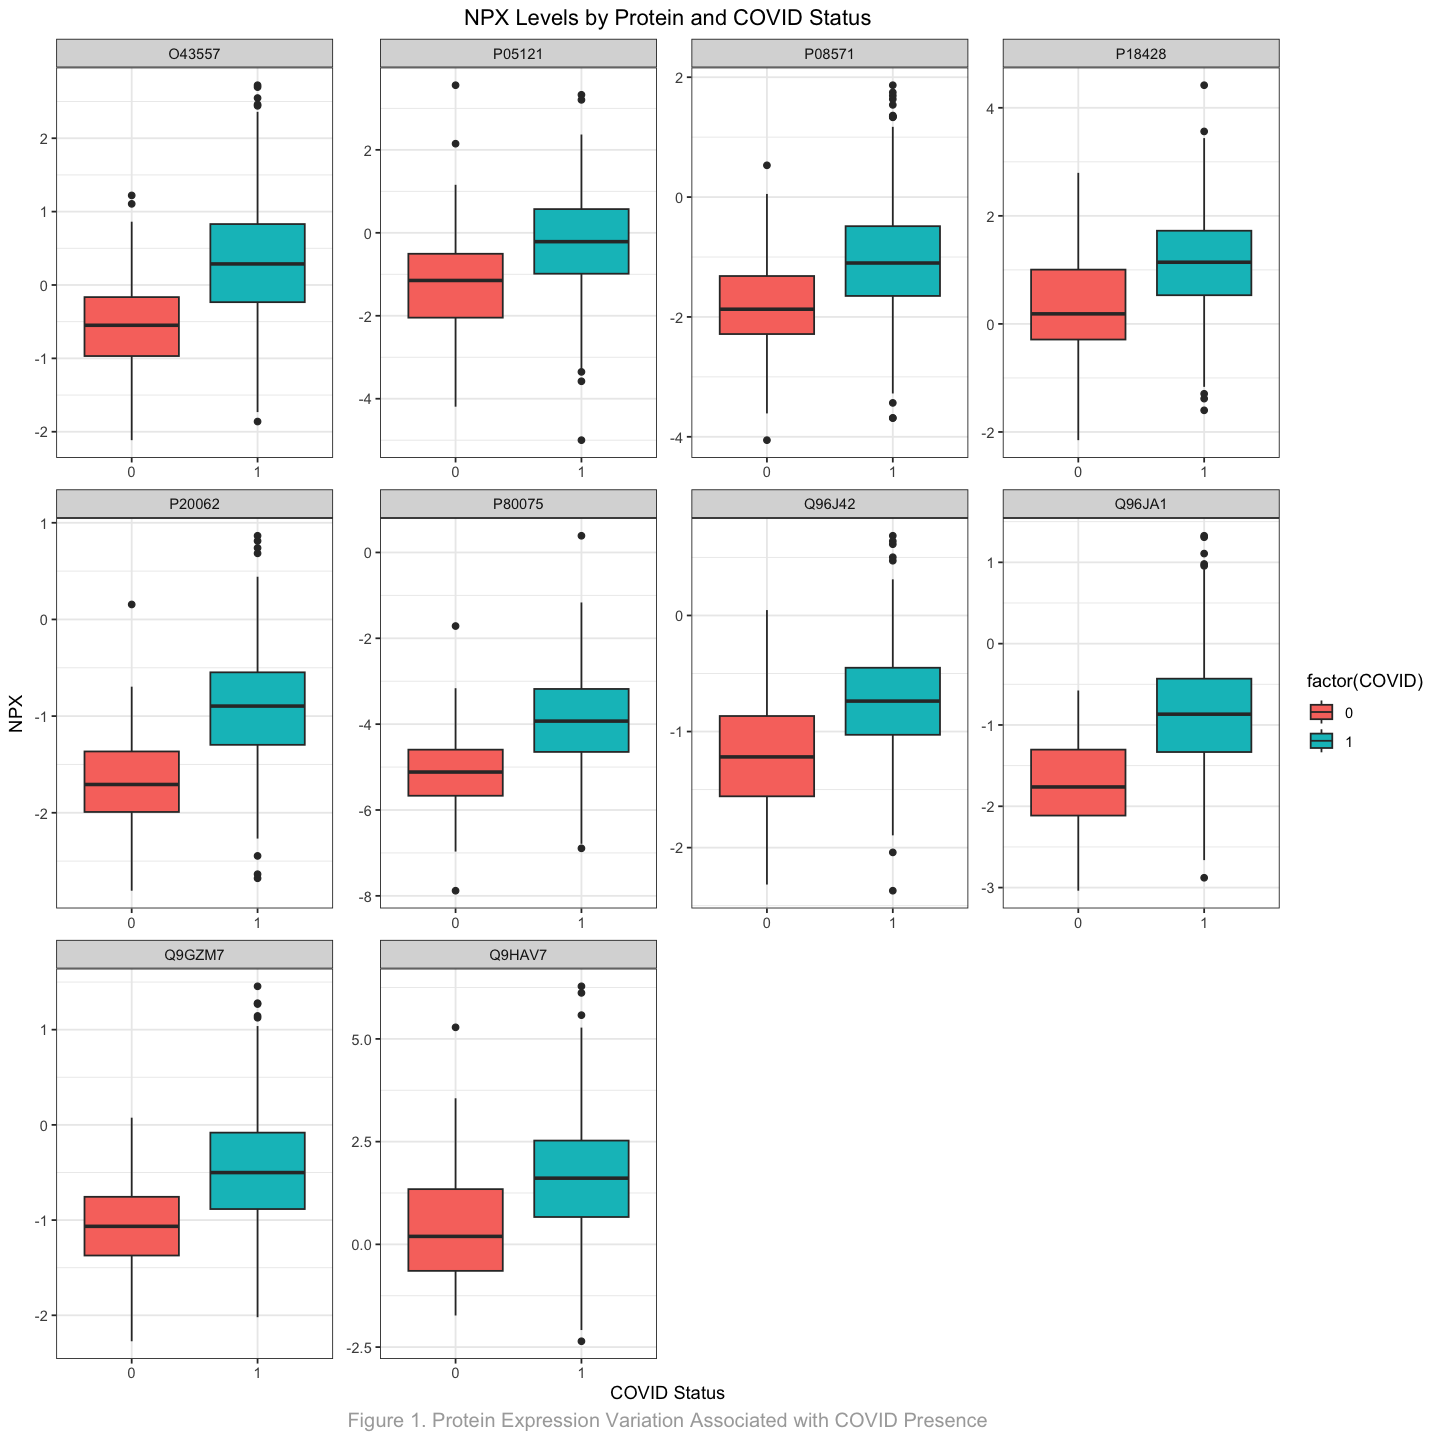

In [83]:
options(repr.plot.width = 12, repr.plot.height = 12)

visualize_top_10_proteins <- join_df |>
      filter(UniProt %in% top_10_proteins) |>
      ggplot(aes(x=COVID, y=NPX, fill=factor(COVID))) +
      geom_boxplot() + 
      labs(title="NPX Levels by Protein and COVID Status",
            x="COVID Status",
            y="NPX",
            caption = "Figure 1. Protein Expression Variation Associated with COVID Presence"
      ) + facet_wrap(~UniProt, scales = "free") +
      theme_bw() + 
      theme(
            plot.title=element_text(hjust = 0.5), 
            plot.caption=element_text(hjust = 0.5, size=12, colour = "darkgrey")) 

visualize_top_10_proteins

### 2.2 Impact of Pre-Existing Health Conditions on COVID Presence

To analyze the relationship between pre-existing health conditions and the presence of COVID-19, I am utilizing a **binomial generalized linear model (GLM)**. This model is well suited to the task because the dependent variable, `COVID`, is binary, indicating whether an individual tests positive (1) or negative (0) for COVID-19.

The model assesses the individual impact of five pre-existing conditions: heart disease, lung disease, kidney disease, diabetes, and hypertension. I have chosen a **non-interaction model**, which assumes that these conditions have independent, additive effects on the likelihood of testing positive for COVID-19. This allows me to observe how each condition contributes to the presence of COVID-19 without accounting for any combined or interactive effects between the conditions at this stage.

My primary objective is to determine which, if any, of these conditions are significantly associated with COVID-19 presence and to identify the condition with the strongest relationship to the outcome.

#### 2.2.1 Hypothesis
- **$H_0$:** Pre-existing health conditions (heart disease, lung disease, kidney disease, diabetes, hypertension) have a significant impact on the presence of COVID-19.
  
- **$H_1$:** Pre-existing health conditions has a significant impact on the presence of COVID-19.

In [11]:
pre_existing_conds = c("HEART", "LUNG", "KIDNEY", "DIABETES", "HTN", "IMMUNO", "COVID")
pre_existing_df <- join_df |>
      select(all_of(pre_existing_conds))

for (column in pre_existing_conds) {
      pre_existing_df[[column]] <- factor(pre_existing_df[[column]])
}

head(pre_existing_df)
str(pre_existing_df)

,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,COVID
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1


'data.frame':	1154048 obs. of  7 variables:
 $ HEART   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ LUNG    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ KIDNEY  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ DIABETES: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HTN     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ IMMUNO  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ COVID   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...


In [12]:
compare_pre_existing_conds <- glm(COVID ~ HEART + LUNG + KIDNEY + DIABETES + HTN + IMMUNO,
            data = pre_existing_df,
            family = binomial
      )

pre_existing_summary <- summary(compare_pre_existing_conds)
print(pre_existing_summary)

pre_existing_summary_df <- data.frame(
      Condition = rownames(pre_existing_summary$coefficients),
      Estimate = pre_existing_summary$coefficients[, "Estimate"],
      STD = pre_existing_summary$coefficients[, "Std. Error"],
      Z_value = pre_existing_summary$coefficients[, "z value"],
      p_value = pre_existing_summary$coefficients[, "Pr(>|z|)"]
)

pre_existing_summary_df |>
      filter(p_value < 0.05)


Call:
glm(formula = COVID ~ HEART + LUNG + KIDNEY + DIABETES + HTN + 
    IMMUNO, family = binomial, data = pre_existing_df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.081029   0.006337  486.20   <2e-16 ***
HEART1      -0.279085   0.007991  -34.93   <2e-16 ***
LUNG1       -1.385784   0.006756 -205.11   <2e-16 ***
KIDNEY1     -0.258386   0.008078  -31.99   <2e-16 ***
DIABETES1    0.424673   0.006998   60.68   <2e-16 ***
HTN1        -0.572461   0.007527  -76.05   <2e-16 ***
IMMUNO1     -1.171622   0.008357 -140.20   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 773343  on 1154047  degrees of freedom
Residual deviance: 688212  on 1154041  degrees of freedom
AIC: 688226

Number of Fisher Scoring iterations: 5



,Condition,Estimate,STD,Z_value,p_value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),(Intercept),3.0810290,0.006336893,486.20502,0.000000e+00
HEART1,HEART1,-0.2790854,0.007990581,-34.92680,2.914718e-267
LUNG1,LUNG1,-1.3857840,0.006756234,-205.11188,0.000000e+00
KIDNEY1,KIDNEY1,-0.2583860,0.008078190,-31.98563,1.727527e-224
DIABETES1,DIABETES1,0.4246733,0.006998466,60.68091,0.000000e+00
HTN1,HTN1,-0.5724614,0.007527214,-76.05224,0.000000e+00
IMMUNO1,IMMUNO1,-1.1716219,0.008356871,-140.19863,0.000000e+00


#### 2.2.2 Results and Interpretation
Based on the results, all the pre-existing health conditions are strongly associated with the presence of COVID-19. Interestingly, only **diabetes** has a positive `Estimate`, representing the log-odds of testing positive for COVID-19 associated with having diabetes, while holding other variables constant. This suggests that individuals with diabetes are more likely to test positive for COVID-19 compared to those without diabetes, indicating that diabetes as a pre-existing condition increases the likelihood of contracting the COVID-19 virus.

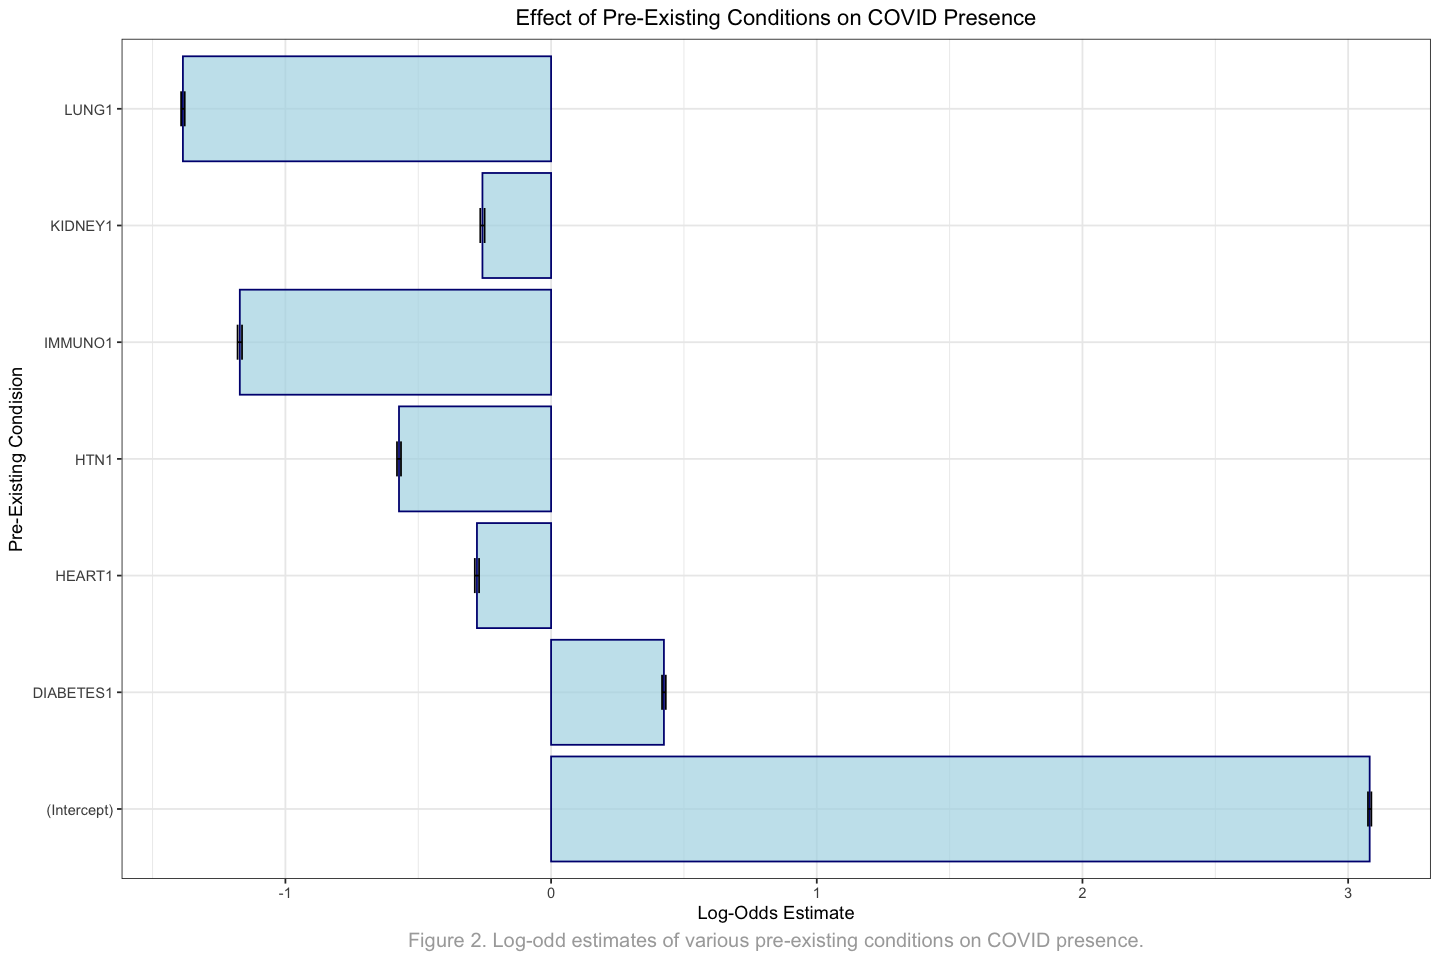

In [90]:
options(repr.plot.width = 12, repr.plot.height = 8)

pre_existing_fig <- ggplot(pre_existing_summary_df, aes(x = Condition, y = Estimate)) +
  geom_bar(stat = "identity", fill = "lightblue", color="navy", alpha=0.7) +
  geom_errorbar(aes(ymin = Estimate - STD, ymax = Estimate + STD), width = 0.3) +
  theme_bw() +
  ggtitle("Effect of Pre-Existing Conditions on COVID Presence") +
  labs(
    y="Log-Odds Estimate",
    x="Pre-Existing Condision",
    caption = "Figure 2. Log-odd estimates of various pre-existing conditions on COVID presence."
    ) +
  coord_flip() +
  theme_bw() + 
      theme(
            plot.title=element_text(hjust = 0.5), 
            plot.caption=element_text(hjust = 0.5, size=12, colour = "darkgrey")) 

pre_existing_fig

As seen from the above, lung disease has the strongest association with testing positive for COVID-19. This indicates that having lung diease is most strongly associated with a reduced likelihood of COVID-19 presence. 

### 2.3 Influence of Age and BMI on COVID-19 Risk

Before statistically analyzing the influence of `Age` and `BMI` on the presence of COVID-19, I will visualize the differences in mean percentages of COVID-19 occurrence across the various categories of both `Age` and `BMI`. This visualization will help illustrate how these factors relate to the likelihood of contracting COVID-19.

In [14]:
age_df <- join_df |>
  group_by(Age_cat) |>
  summarise(
    total_cases = n(),
    covid_positive = sum(COVID == 1),
    covid_percentage = (covid_positive / total_cases) * 100
  )

bmi_df <- join_df |>
  group_by(BMI_cat) |>
  summarise(
    total_cases = n(),
    covid_positive = sum(COVID == 1),
    covid_percentage = (covid_positive / total_cases) * 100
  )

age_df
bmi_df

Age_cat,total_cases,covid_positive,covid_percentage
<int>,<int>,<int>,<dbl>
1,88320,82432,93.33333
2,216384,206080,95.23810
3,338560,306176,90.43478
4,315008,262016,83.17757
5,195776,176640,90.22556


BMI_cat,total_cases,covid_positive,covid_percentage
<int>,<int>,<int>,<dbl>
0,16192,8832,54.54545
1,203136,156032,76.81159
2,409216,391552,95.68345
3,341504,310592,90.94828
4,141312,128064,90.62500
5,42688,38272,89.65517


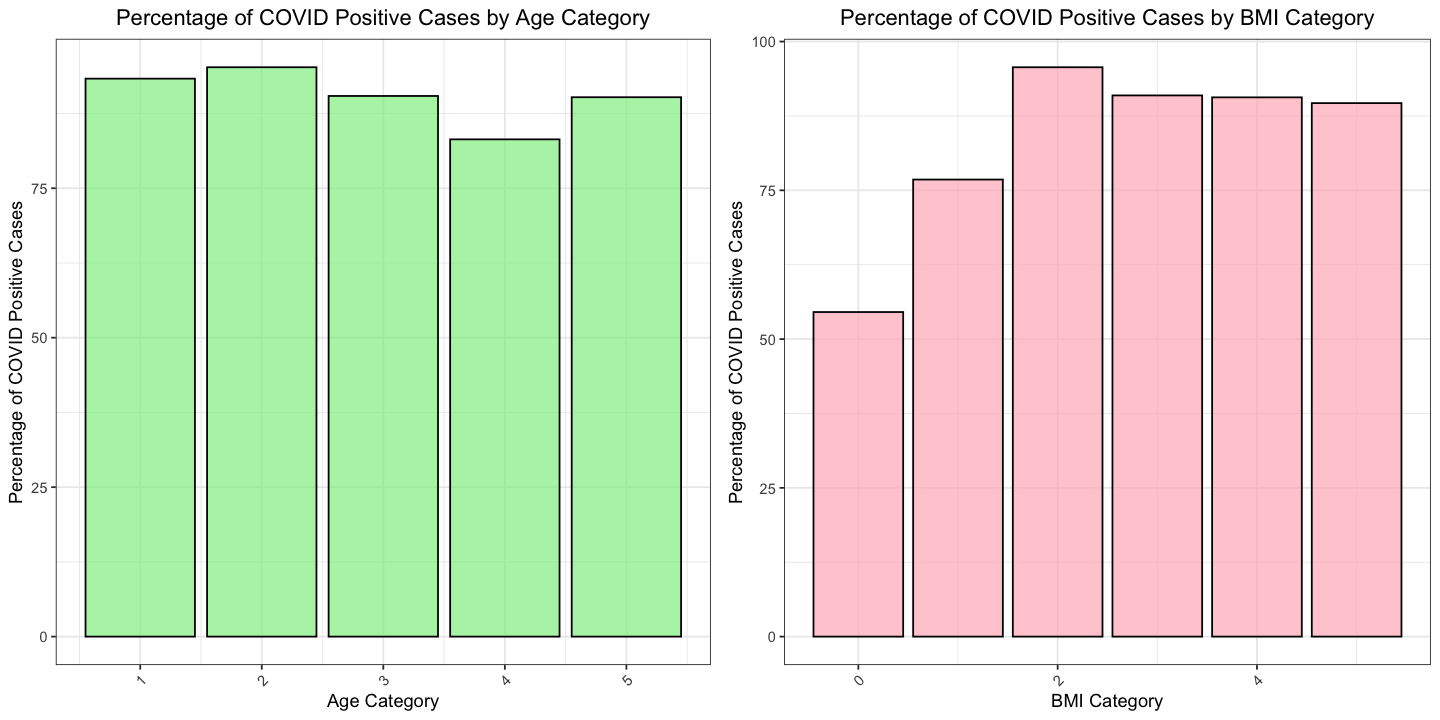

In [89]:
options(repr.plot.width = 12, repr.plot.height = 6)

age_fig <- ggplot(age_df, aes(x = Age_cat, y = covid_percentage)) +
  geom_bar(stat = "identity", position = "dodge", fill="lightgreen", color="black", alpha=0.7) +
  theme_bw() +
  ggtitle("Percentage of COVID Positive Cases by Age Category") +
  xlab("Age Category") +
  ylab("Percentage of COVID Positive Cases") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

bmi_fig <- ggplot(bmi_df, aes(x = BMI_cat, y = covid_percentage)) +
  geom_bar(stat = "identity", position = "dodge", fill="lightpink", color="black", alpha=0.7) +
  theme_bw() +
  ggtitle("Percentage of COVID Positive Cases by BMI Category") +
  xlab("BMI Category") +
  ylab("Percentage of COVID Positive Cases") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

age_bmi_fig <- plot_grid(age_fig, bmi_fig, ncol=2)
age_bmi_fig

The visualization above reveals that, for `Age`, the likelihood of contracting COVID-19 remains relatively consistent across different age groups. In contrast, the visualization suggests that higher `BMI` values may be associated with an increased probability of testing positive for the COVID-19 virus. 

To further investigate these relationships, we will conduct a **Chi-Square test** to assess the independence of COVID-19 presence across the various age and BMI categories. This statistical test will help determine if the observed differences in COVID-19 rates among these groups are statistically significant.

**Chi-Square test** is the ideal choice of modelling for the task as it specializes in determining association between categorical variables. 

#### 2.3.1 Hypothesis
- $H_0$: There is no significant association between the presence of COVID-19 and the age group (or BMI category).
- $H_1$: There is a significant association between the presence of COVID-19 and the age group (or BMI category).

In [92]:
options(repr.plot.width = 8, repr.plot.height = 6)

determine_statistical_relationship <- function(data, col_name) {
      print(paste("Chi-Square Test Results for", col_name))

      contingency_table <- table(data[[col_name]], data[["COVID"]])
      chi2_test <- chisq.test(contingency_table)
      result_df <- data.frame(
            Chi2 = chi2_test$statistic,
            DF = chi2_test$parameter,
            p_value = chi2_test$p.value
      )
      fig <- ggplot(data, aes_string(x = col_name)) +
            geom_bar(position = "dodge", fill="salmon", colour="black", alpha=0.5) +
            labs(title = paste0("Association between ", col_name, " and ", " COVID"), 
                  y = "Count") +
            theme_bw() + 
            theme(plot.title = element_text(hjust = 0.5),
                  axis.text.x = element_text(angle = 45, hjust = 1)
            )
      print(fig)

      return(result_df)
}

[1] "Chi-Square Test Results for Age_cat"


,Chi2,DF,p_value
,<dbl>,<int>,<dbl>
X-squared,22862.47,4,0


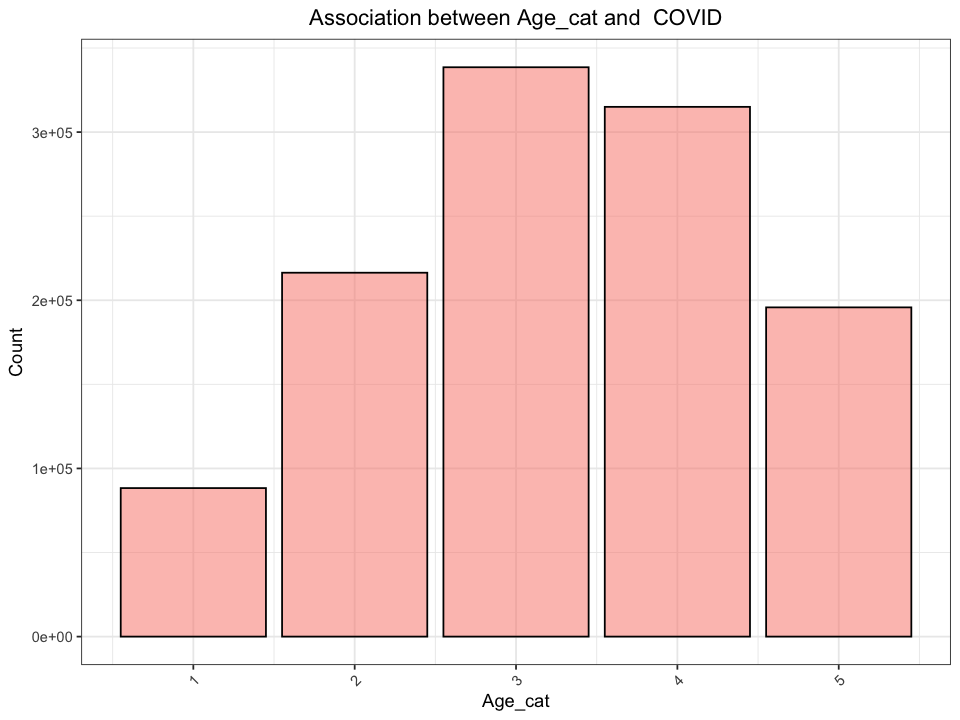

In [93]:
determine_statistical_relationship(join_df, "Age_cat")

[1] "Chi-Square Test Results for BMI_cat"


,Chi2,DF,p_value
,<dbl>,<int>,<dbl>
X-squared,73707.03,5,0


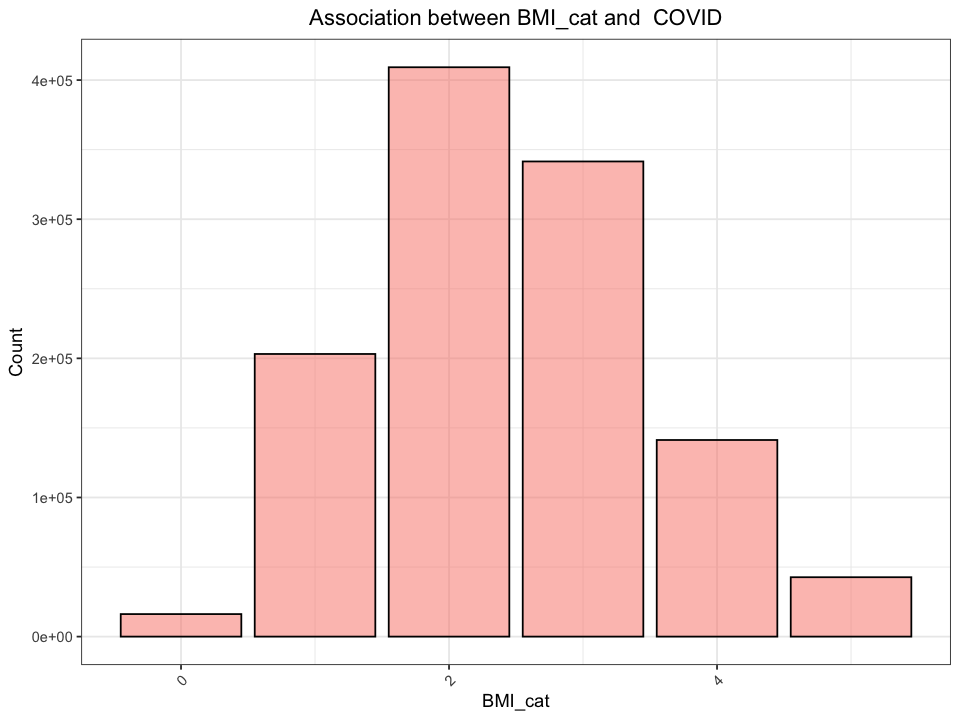

In [87]:
determine_statistical_relationship(join_df, "BMI_cat")

#### 2.3.2 Results and Interpretation
Since the $p$-values from both Chi-Square tests are below the significance level of $a$ = $0.05$, we conclude that there are statistically significant associations between age groups and BMI categories with the presence of COVID-19. This indicates that the likelihood of contracting COVID-19 varies significantly across different age groups and BMI categories. 

## References

[^ref1]: Olink Proteomics. (n.d.). *MGH COVID-19 study overview*. Retrieved October 28, 2024, from https://info.olink.com/mgh-covid-study-overview-page